# Read & interpret dataset

Loading some datasets <p>
Preprocessing missing values and outliers on the datasets

In [168]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt #描画ライブラリ
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pathlib
import glob
import math
import statsmodels.api as sm
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime


# Show all the rows and columns up to 200
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

## JEPX_Intra_datasets
http://www.jepx.org/market/index.html

In [169]:
# read the dataset (Here, these are re-organised after getting the latest dataset)

#Intra_dataset
df_intra_2016 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2016.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2017 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2017.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2018 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2018.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2019 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2019.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2020 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2020.csv', sep=',', header=0, encoding='shift_jis')

In [170]:
# marge all the intra datasets
df_intra = pd.concat([df_intra_2016, df_intra_2017])
df_intra = pd.concat([df_intra, df_intra_2018])
df_intra = pd.concat([df_intra, df_intra_2019])
df_intra = pd.concat([df_intra, df_intra_2020])

In [171]:
df_intra = df_intra.rename(columns={'年月日': 'Date', 
                                    '時刻コード': 'HH',
                                    '始値（円/kWh）': 'Open',
                                    '高値（円/kWh）': 'High',
                                    '安値（円/kWh）': 'Low',
                                    '終値（円/kWh）': 'Close',
                                    '平均（円/kWh）': 'Average',
                                    '約定量合計（MWh/h）': 'Volume(MWh/h)',
                                    '約定件数': 'Volume(Tick count)'})

In [172]:
# # Apply to_datetime
df_intra["Date"] = pd.to_datetime(df_intra["Date"])

In [173]:
df_intra.tail()

,Date,HH,Open,High,Low,Close,Average,Volume(MWh/h),Volume(Tick count)
14148,2021-01-20,37,200.00,203.98,150.00,199.30,186.25,1750.4,239
14149,2021-01-20,38,200.00,203.98,49.00,49.00,181.21,1414.0,244
14150,2021-01-20,39,200.00,200.50,49.00,49.00,176.98,1006.9,197
14151,2021-01-20,40,184.24,190.00,69.89,69.89,159.62,781.6,141
14152,2021-01-20,41,200.00,201.00,69.89,69.89,174.45,1036.4,150


In [174]:
df_intra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84281 entries, 0 to 14152
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                84281 non-null  datetime64[ns]
 1   HH                  84281 non-null  int64         
 2   Open                84209 non-null  float64       
 3   High                84209 non-null  float64       
 4   Low                 84209 non-null  float64       
 5   Close               84209 non-null  float64       
 6   Average             84209 non-null  float64       
 7   Volume(MWh/h)       84209 non-null  float64       
 8   Volume(Tick count)  84281 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 6.4 MB


## JEPX Day-Ahead market dataset

In [175]:
# read the dataset (Here, these are re-organised after getting the latest dataset)

#Spot_dataset
df_spot_2016 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2016.csv', sep=',', header=0, encoding='shift_jis')
df_spot_2017 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2017.csv', sep=',', header=0, encoding='shift_jis')
df_spot_2018 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2018.csv', sep=',', header=0, encoding='shift_jis')
df_spot_2019 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2019.csv', sep=',', header=0, encoding='shift_jis')
df_spot_2020 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2020.csv', sep=',', header=0, encoding='shift_jis')

# marge all the spot datasets
df_spot = pd.concat([df_spot_2016, df_spot_2017])
df_spot = pd.concat([df_spot, df_spot_2018])
df_spot = pd.concat([df_spot, df_spot_2019])
df_spot = pd.concat([df_spot, df_spot_2020])

In [176]:
# Pick up some columns
df_spot = df_spot.drop(['Unnamed: 15', 'スポット・時間前平均価格(円/kWh)', 'Unnamed: 21',
       'α上限値×スポット・時間前平均価格(円/kWh)', 'α下限値×スポット・時間前平均価格(円/kWh)',
       'α速報値×スポット・時間前平均価格(円/kWh)', 'α確報値×スポット・時間前平均価格(円/kWh)',
       '回避可能原価北海道(円/kWh)', '回避可能原価東北(円/kWh)',
       '回避可能原価東京(円/kWh)', '回避可能原価中部(円/kWh)', '回避可能原価北陸(円/kWh)',
       '回避可能原価関西(円/kWh)', '回避可能原価中国(円/kWh)', '回避可能原価四国(円/kWh)',
       '回避可能原価九州(円/kWh)'], axis=1)

# Rename them
df_spot = df_spot.rename(columns={'年月日': 'Date', '時刻コード': 'HH', '売り入札量(kWh)': 'Sell_volume(kWh)',
                                  '買い入札量(kWh)': 'Buy_volume(kWh)', '約定総量(kWh)': 'Total_volume(kWh)', 'システムプライス(円/kWh)': 'System_price(Yen/kWh)', 
                                  'エリアプライス北海道(円/kWh)': 'Price_Hokkaido(Yen/kWh)', 'エリアプライス東北(円/kWh)': 'Price_Tohoku(Yen/kWh)', 
                                  'エリアプライス東京(円/kWh)': 'Price_Tokyo(Yen/kWh)', 'エリアプライス中部(円/kWh)': 'Price_Chubu(Yen/kWh)', 
                                  'エリアプライス北陸(円/kWh)': 'Price_Hokuriku(Yen/kWh)','エリアプライス関西(円/kWh)': 'Price_Kansai(Yen/kWh)', 
                                  'エリアプライス中国(円/kWh)': 'Price_Chugoku(Yen/kWh)', 'エリアプライス四国(円/kWh)': 'Price_Shikoku(Yen/kWh)',
                                  'エリアプライス九州(円/kWh)': 'Price_Kyushu(Yen/kWh)',  '回避可能原価全国値(円/kWh)': 'Avoidable_price(Yen/kWh)'
#                                   'α上限値×スポット・時間前平均価格(円/kWh)': 'αUpper_SpotIntraMean', 'α下限値×スポット・時間前平均価格(円/kWh)': 'αLower_SpotIntraMean',
#                                   'α速報値×スポット・時間前平均価格(円/kWh)': 'αPrompt_SpotIntraMean', 'α確報値×スポット・時間前平均価格(円/kWh)': 'αComfirmed_SpotIntraMean', 
                                 })

# # Apply to_datetime
df_spot["Date"] = pd.to_datetime(df_spot["Date"])

## ※一旦Systempriceのみで試す

In [177]:
df_spot = df_spot[["Date", "HH", "System_price(Yen/kWh)"]]

In [178]:
df_spot.head()

,Date,HH,System_price(Yen/kWh)
0,2016-04-01,1,6.61
1,2016-04-01,2,6.34
2,2016-04-01,3,6.34
3,2016-04-01,4,6.25
4,2016-04-01,5,6.57


## Half Hourly time slot

時間の切上げ切り捨てについて
https://www.deep-rain.com/programming/python/1355#i-4

In [179]:
# Make a table for QH_number
df_intra_HH = df_intra.reset_index()
HH_table = pd.DataFrame(df_intra_HH["HH"])
HH_table = HH_table.drop_duplicates()
HH_table['Time'] = pd.date_range('2020/01/01', periods=48,  freq='30min').strftime('%H:%M')
HH_table['Time'] = HH_table['Time'].str[-8:]
# HH_table['Hourly_Time'] = pd.date_range('2020/01/01', periods=48,  freq='30min').floor("H").strftime('%H:%M')
# HH_table['Hourly_Time'] = pd.to_datetime(HH_table['Hourly_Time']).dt.time

HH_table.head()

,HH,Time
0,1,00:00
1,2,00:30
2,3,01:00
3,4,01:30
4,5,02:00


# Make all_data

In [262]:
HH_table = pd.DataFrame(df_intra_HH["HH"])
HH_table = HH_table.drop_duplicates()
time = df_actual_generation_Tohoku["Time"]
time = pd.DataFrame(time)
time = time.drop_duplicates()
HH_table["Time"] = time

## Merge all input data

In [263]:
all_data = df_intra.copy()

# HH_table
all_data = pd.merge(all_data, HH_table, how="left", on=['HH'])

# System price
all_data = pd.merge(all_data, df_spot, how="left", on=['Date', 'HH'])


all_data.head(10)

,Date,HH,Open,High,Low,Close,Average,Volume(MWh/h),Volume(Tick count),Time,System_price(Yen/kWh)
0,2016-04-01,1,7.69,7.69,7.69,7.69,7.69,0.7,1,00:00:00,6.61
1,2016-04-01,2,NaN,NaN,NaN,NaN,NaN,NaN,0,00:30:00,6.34
2,2016-04-01,3,7.21,7.21,7.21,7.21,7.21,0.8,1,01:00:00,6.34
3,2016-04-01,4,7.06,7.06,7.06,7.06,7.06,0.8,1,01:30:00,6.25
4,2016-04-01,5,7.21,7.21,7.21,7.21,7.21,0.8,1,02:00:00,6.57
5,2016-04-01,6,7.21,7.21,7.21,7.21,7.21,0.8,1,02:30:00,6.57
6,2016-04-01,7,7.21,7.21,7.21,7.21,7.21,0.8,1,03:00:00,6.57
7,2016-04-01,8,7.21,7.21,7.21,7.21,7.21,0.8,1,03:30:00,6.57
8,2016-04-01,9,7.06,7.06,7.06,7.06,7.06,0.8,1,04:00:00,6.57
9,2016-04-01,10,7.06,7.06,7.06,7.06,7.06,0.8,1,04:30:00,6.57


In [264]:
print(all_data.isnull().sum())

Date                      0
HH                        0
Open                     72
High                     72
Low                      72
Close                    72
Average                  72
Volume(MWh/h)            72
Volume(Tick count)        0
Time                      0
System_price(Yen/kWh)     0
dtype: int64


In [265]:
# Fillna with the average between the previous and later slots for Price, Weather, Demend
all_data.interpolate(method='linear', inplace=True)
print(all_data.isnull().sum())

Date                     0
HH                       0
Open                     0
High                     0
Low                      0
Close                    0
Average                  0
Volume(MWh/h)            0
Volume(Tick count)       0
Time                     0
System_price(Yen/kWh)    0
dtype: int64


In [266]:
# Create a column for "date block num"
all_data['Date'] = pd.to_datetime(all_data['Date'])
# all_data["date_block_num"] = np.trunc(all_data['Date'].map(pd.Timestamp.timestamp).astype(int) / 86400 - 16891)

※ Filter all_data from 2016-04-01 to 2020-12-31

In [267]:
all_data = all_data[all_data["Date"] <= "2020-12-31"]

In [268]:
all_data['month'] = pd.to_datetime(all_data["Date"]).dt.month

In [269]:
all_data.head()

,Date,HH,Open,High,Low,Close,Average,Volume(MWh/h),Volume(Tick count),Time,System_price(Yen/kWh),month
0,2016-04-01,1,7.69,7.69,7.69,7.69,7.69,0.70,1,00:00:00,6.61,4
1,2016-04-01,2,7.45,7.45,7.45,7.45,7.45,0.75,0,00:30:00,6.34,4
2,2016-04-01,3,7.21,7.21,7.21,7.21,7.21,0.80,1,01:00:00,6.34,4
3,2016-04-01,4,7.06,7.06,7.06,7.06,7.06,0.80,1,01:30:00,6.25,4
4,2016-04-01,5,7.21,7.21,7.21,7.21,7.21,0.80,1,02:00:00,6.57,4


# Feature Engineering

## Lag-features (Avoiding data leakage)

※Infinity value will be happen with Downcast preprocessing. ("Total" column)

In [270]:
# Check the remaining memory on PC
import gc
gc.collect()

20328

In [271]:
# This is for generating lag
def generate_lag(train, lag_sizes, cols, lag_sizes_type):

    lag_sizes = np.array(lag_sizes)
    if lag_sizes_type == "HH":
        lag_sizes_adj = lag_sizes * 1 # nothing changes
    elif lag_sizes_type == "Hours":
        lag_sizes_adj = lag_sizes * 2
    elif lag_sizes_type == "Day":
        lag_sizes_adj = lag_sizes * 48

    for ix, lag_sizes_adj_ in enumerate(lag_sizes_adj):
        shifted_df = all_data[cols].shift(lag_sizes_adj_)
        shifted_df.columns = [f"{col_name}_lag_{lag_sizes[ix]}_{lag_sizes_type}" for col_name in shifted_df.columns]
        if ix == 0:
            shifted_df_return = shifted_df
        else:
            shifted_df_return = shifted_df_return.merge(shifted_df, how="left", left_index=True, right_index=True)
    return shifted_df_return

- Prediction point is at 17:00 on a day before the delivery date.
- At least, 2day-lag is necessary to avoid data leakage.

In [272]:
# Drop columns that are not necessary to generate lag features
lag_columns = all_data.columns.drop(['Date', 'Time', 'HH', 'System_price(Yen/kWh)', 'month'])

# Generate lag features and drop original columns
# all_data_lagged_HH = generate_lag(all_data, [49, 97], lag_columns, "HH")
# all_data_lagged_Hour = generate_lag(all_data, [2], lag_columns, "Hours")
all_data_lagged_Day = generate_lag(all_data, [2, 3], lag_columns, "Day")

# join everything
# all_data_lagged = pd.merge(all_data, all_data_lagged_HH, how="left", left_index=True, right_index=True)
# all_data = pd.merge(all_data, all_data_lagged_Hour, how="left", left_index=True, right_index=True)
all_data_lagged = pd.merge(all_data, all_data_lagged_Day, how="left", left_index=True, right_index=True)

# Drop lag_columns which can be data leakage
all_data_lagged = all_data_lagged.drop(lag_columns, axis=1)

# Keep both the original and lagged "Close" --> Original: target / Lagged: feature
all_data_lagged["Close"] = all_data["Close"]

In [273]:
# # Check the lag columns
# temp_col = [item for item in all_data_lagged.columns if item.find('Day') != -1]

# print(temp_col)

In [274]:
print(all_data_lagged.isnull().sum().head(50))

Date                              0
HH                                0
Time                              0
System_price(Yen/kWh)             0
month                             0
Open_lag_2_Day                   96
High_lag_2_Day                   96
Low_lag_2_Day                    96
Close_lag_2_Day                  96
Average_lag_2_Day                96
Volume(MWh/h)_lag_2_Day          96
Volume(Tick count)_lag_2_Day     96
Open_lag_3_Day                  144
High_lag_3_Day                  144
Low_lag_3_Day                   144
Close_lag_3_Day                 144
Average_lag_3_Day               144
Volume(MWh/h)_lag_3_Day         144
Volume(Tick count)_lag_3_Day    144
Close                             0
dtype: int64


In [275]:
all_data_lagged.fillna(0, inplace=True)
print(all_data_lagged.isnull().sum().head(50))

Date                            0
HH                              0
Time                            0
System_price(Yen/kWh)           0
month                           0
Open_lag_2_Day                  0
High_lag_2_Day                  0
Low_lag_2_Day                   0
Close_lag_2_Day                 0
Average_lag_2_Day               0
Volume(MWh/h)_lag_2_Day         0
Volume(Tick count)_lag_2_Day    0
Open_lag_3_Day                  0
High_lag_3_Day                  0
Low_lag_3_Day                   0
Close_lag_3_Day                 0
Average_lag_3_Day               0
Volume(MWh/h)_lag_3_Day         0
Volume(Tick count)_lag_3_Day    0
Close                           0
dtype: int64


## Standardise with Log-features (対数化)

[Mission]
対数の逆対数変換をして元の数値を得ること
-->グラフで可視化してみる (Closeと対数化Close)線グラフ
-->逆対数の数式を手動で適用してみる
-->

Skew: 5.771550
Kurt: 75.846330


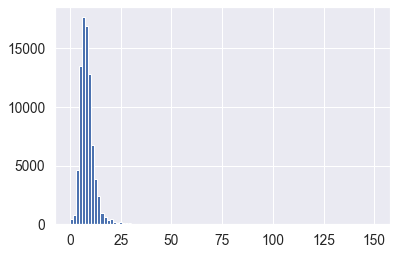

In [276]:
all_data_lagged["Close"].hist(bins=100);
print("Skew: %f" % all_data_lagged["Close"].skew())
print("Kurt: %f" % all_data_lagged["Close"].kurt())

- Positive skew
- High kurt --> Fat tail

In [277]:
cols = all_data_lagged.columns

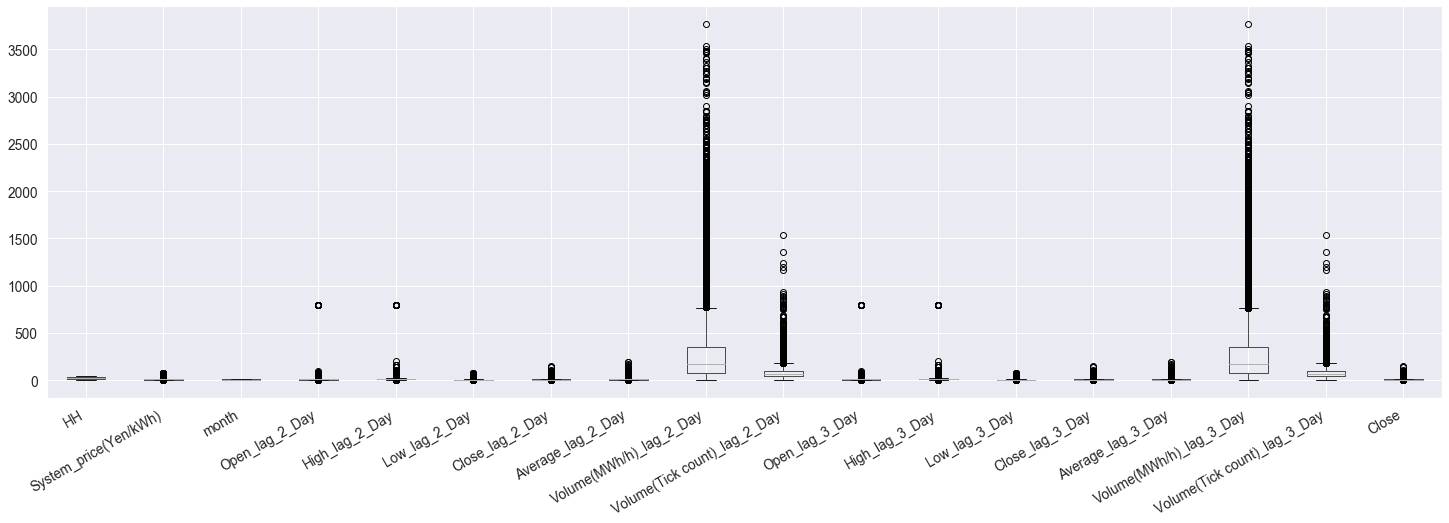

In [278]:
plt.figure(figsize = (25,8))
all_data_lagged[cols].boxplot()
plt.gcf().autofmt_xdate()

plt.show()

Features seem to be positive skew, and have different scale. --> Need to standardise

In [279]:
for i in all_data_lagged:
   print(str(min(all_data_lagged[i])) + "\t" + str(i))

2016-04-01 00:00:00	Date
1	HH
00:00:00	Time
0.01	System_price(Yen/kWh)
1	month
0.0	Open_lag_2_Day
0.0	High_lag_2_Day
0.0	Low_lag_2_Day
0.0	Close_lag_2_Day
0.0	Average_lag_2_Day
0.0	Volume(MWh/h)_lag_2_Day
0.0	Volume(Tick count)_lag_2_Day
0.0	Open_lag_3_Day
0.0	High_lag_3_Day
0.0	Low_lag_3_Day
0.0	Close_lag_3_Day
0.0	Average_lag_3_Day
0.0	Volume(MWh/h)_lag_3_Day
0.0	Volume(Tick count)_lag_3_Day
0.01	Close


In [280]:
all_data_lagged1 = all_data_lagged[['Date', 'Time', 'HH', 'month']]
all_data_lagged2 = all_data_lagged.drop(['Date', 'Time', 'HH', 'month'], axis=1)

In [281]:
# logarithmic transformation for standardised
# PowerTransformer() for applying Yeo-Johnson
from sklearn.preprocessing import PowerTransformer
def trans_yeo_johnson(df, df2):
    pt = PowerTransformer() #default: Yeo-Johnson (this allow also 0-value to transform to logarithmic value)
    pt.fit_transform(df)
    return pt.transform(df2)

def inverse_trans_yeo_johnson(df, df2):
    pt = PowerTransformer() #default: Yeo-Johnson (this allow also 0-value to transform to logarithmic value)
    pt.fit_transform(df)
    return pt.inverse_transform(df2)

In [282]:
#　対数変換
all_data_log2_transformed = all_data_lagged2.copy()
cols = all_data_log2_transformed.columns

all_data_log2_transformed = trans_yeo_johnson(all_data_lagged2, all_data_log2_transformed)
all_data_log2_transformed = pd.DataFrame(all_data_log2_transformed)
all_data_log2_transformed.columns = cols

In [283]:
all_data_log = pd.concat([all_data_lagged1, all_data_log2_transformed], axis=1)

Skew: 0.016581
Kurt: 5.092394
Mean: -0.000000
Std: 1.000006


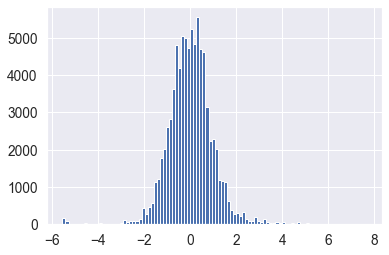

In [284]:
all_data_log["Close"].hist(bins=100);
print("Skew: %f" % all_data_log["Close"].skew())
print("Kurt: %f" % all_data_log["Close"].kurt())
print("Mean: %f" % all_data_log["Close"].mean())
print("Std: %f" % all_data_log["Close"].std())

In [285]:
print(all_data_log.isnull().sum().head(50))

Date                            0
Time                            0
HH                              0
month                           0
System_price(Yen/kWh)           0
Open_lag_2_Day                  0
High_lag_2_Day                  0
Low_lag_2_Day                   0
Close_lag_2_Day                 0
Average_lag_2_Day               0
Volume(MWh/h)_lag_2_Day         0
Volume(Tick count)_lag_2_Day    0
Open_lag_3_Day                  0
High_lag_3_Day                  0
Low_lag_3_Day                   0
Close_lag_3_Day                 0
Average_lag_3_Day               0
Volume(MWh/h)_lag_3_Day         0
Volume(Tick count)_lag_3_Day    0
Close                           0
dtype: int64


※ Confirm whether inverse transform works appropriately, or not

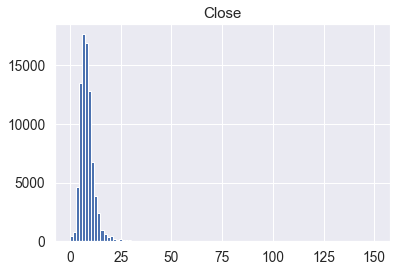

In [286]:
# inverse only for Close (Target)
y_log_inversed = inverse_trans_yeo_johnson(all_data_lagged2["Close"].values.reshape(-1,1), all_data_log["Close"].values.reshape(-1, 1))
y_log_inversed = pd.DataFrame(y_log_inversed)
y_log_inversed.columns = ["Close"]
y_log_inversed.hist(bins=100);

# EDA (for all_data)

## Check the correlation of features with the target
    -->上位相関(正と負)はピックアップして更に数値にしてみる

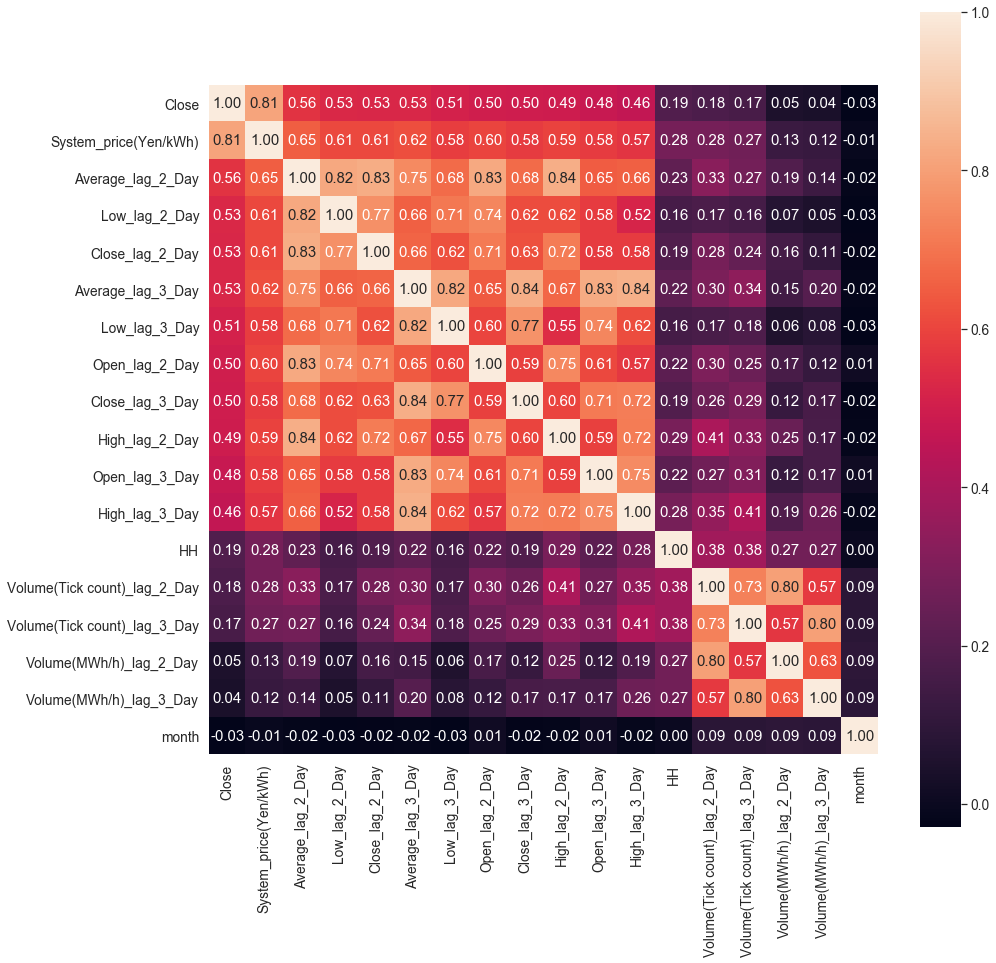

In [287]:
# correlation matrix
corrmat = all_data_log.corr()

k = 20 # The number of variables on the heatmap
cols = corrmat.nlargest(k, 'Close')['Close'].index
cm = np.corrcoef(all_data_log[cols].values.T)
f, ax = plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

※In the case of Day1_lag: Ave=0.65, Low=0.62, Open=0.57, Low_HHlag=0.57,HIgh=0.56,Ave_HHlag=0.55<p>

In [288]:
# # scatterplot
# sns.set()
# cols = all_data_log.columns
# # cols = ['Close', 'Average_lag_1_Day', 'Average_lag_49_HH', 'Low_lag_1_Day', 'Low_lag_49_HH', 
# #         'Open_lag_1_Day', 'Open_lag_49_HH', 'High_lag_1_Day', 'High_lag_49_HH', 'Average_lag_2_Day']
# sns.pairplot(all_data_log[cols], size=2.5)
# plt.show()

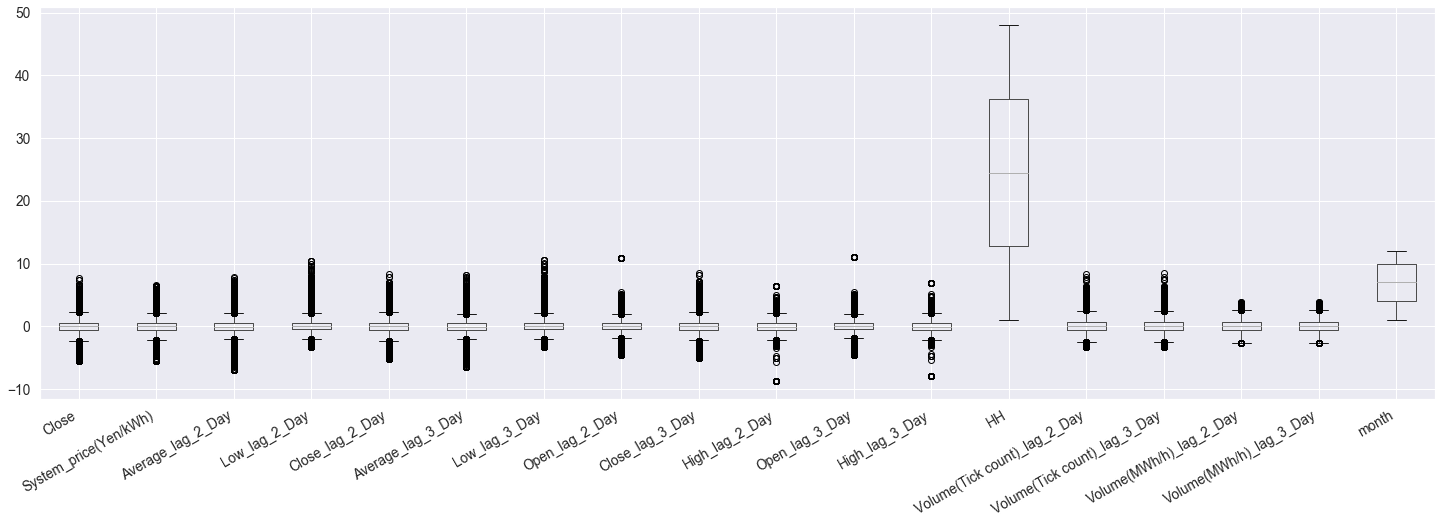

In [289]:
plt.figure(figsize = (25,8))
all_data_log[cols].boxplot()
plt.gcf().autofmt_xdate()

plt.show()

# Training Models with "all_data"

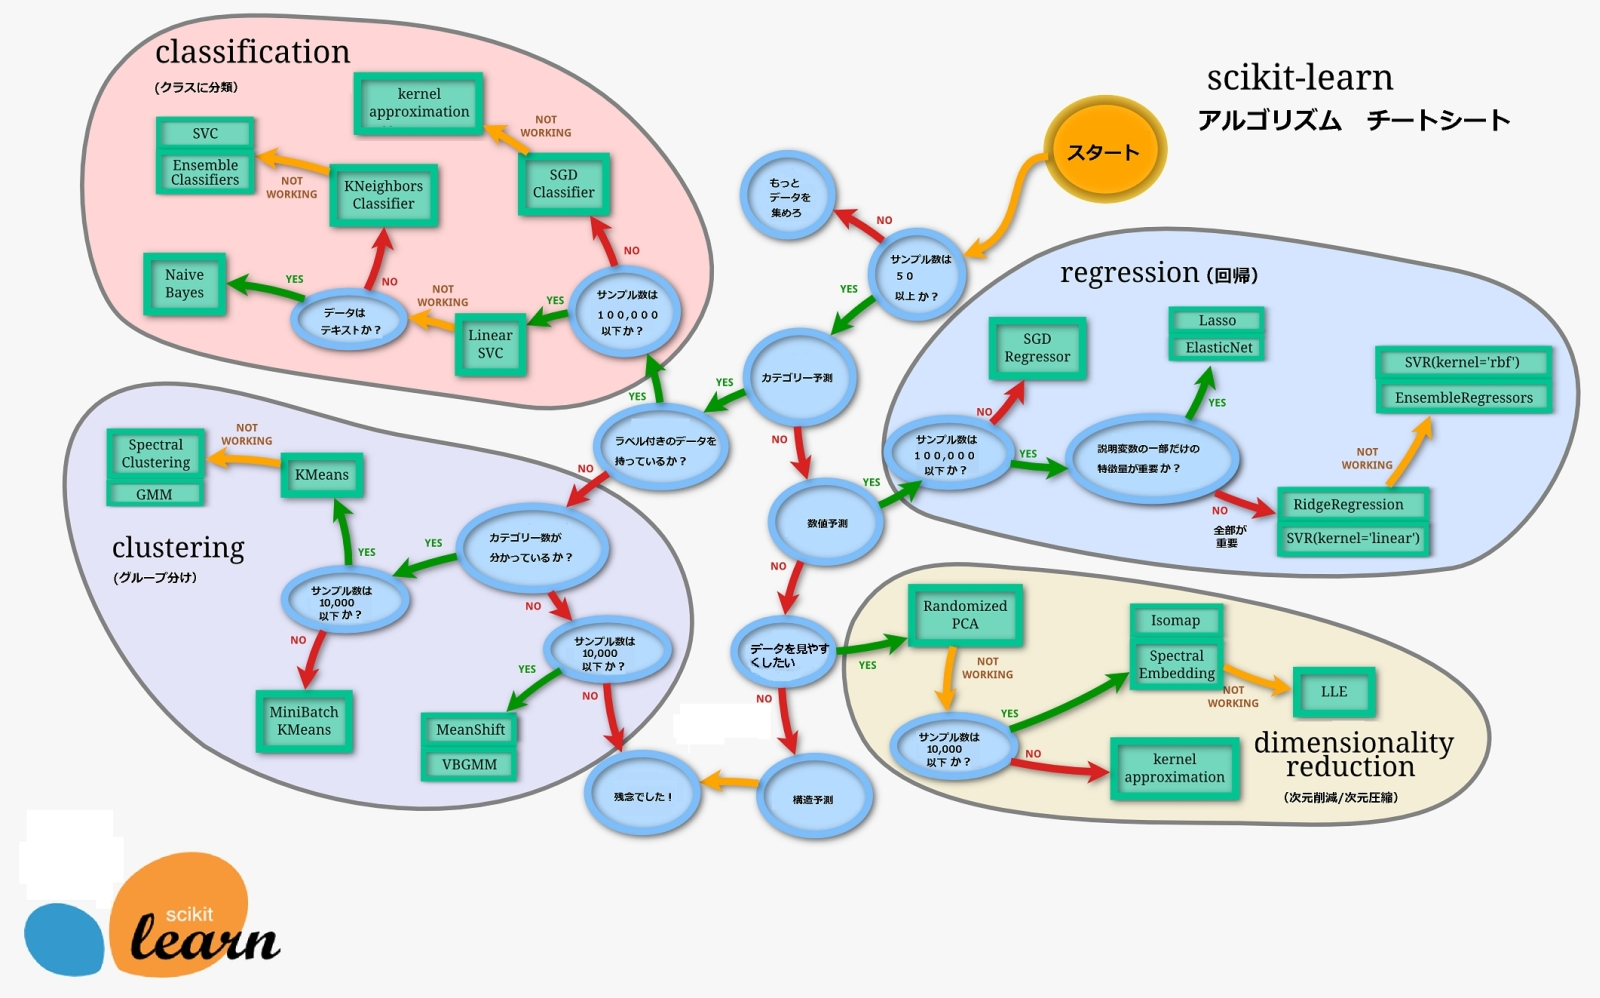

Source: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

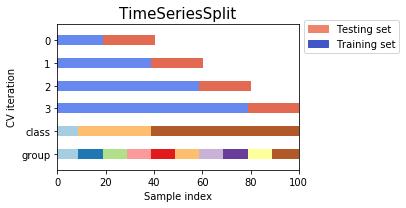

Split all_data set based on time-base

※Sckitlearn for TimeseriesSplit, using "max_train_size" parameter
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

## Preparation

In [419]:
X = all_data_log.drop(['Close', 'Date', 'Time'], axis=1)
y = all_data_log.Close

In [420]:
# Rolling/Walk forward validation (Timeseries validation with the parameter of "max_train_size")
from sklearn.model_selection import TimeSeriesSplit

n_splits=10
train_ratio=8
test_ratio=2
max_train_size=int(round((len(X)*train_ratio)/(train_ratio+test_ratio*n_splits), 0))
test_size=int(round((len(X)*test_ratio)/(train_ratio+test_ratio*n_splits), 0))

tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size
#                        , max_train_size=max_train_size
                      )
Min_valid_index = len(X) - (n_splits * test_size)

print(tscv)
print('Minimum of valid_index: %.0f' % Min_valid_index)

# Confirming the split logic
for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    print("TRAIN:", train_index, "Valid:", valid_index)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=5952)
Minimum of valid_index: 23808
TRAIN: [    0     1     2 ... 23805 23806 23807] Valid: [23808 23809 23810 ... 29757 29758 29759]
TRAIN: [    0     1     2 ... 29757 29758 29759] Valid: [29760 29761 29762 ... 35709 35710 35711]
TRAIN: [    0     1     2 ... 35709 35710 35711] Valid: [35712 35713 35714 ... 41661 41662 41663]
TRAIN: [    0     1     2 ... 41661 41662 41663] Valid: [41664 41665 41666 ... 47613 47614 47615]
TRAIN: [    0     1     2 ... 47613 47614 47615] Valid: [47616 47617 47618 ... 53565 53566 53567]
TRAIN: [    0     1     2 ... 53565 53566 53567] Valid: [53568 53569 53570 ... 59517 59518 59519]
TRAIN: [    0     1     2 ... 59517 59518 59519] Valid: [59520 59521 59522 ... 65469 65470 65471]
TRAIN: [    0     1     2 ... 65469 65470 65471] Valid: [65472 65473 65474 ... 71421 71422 71423]
TRAIN: [    0     1     2 ... 71421 71422 71423] Valid: [71424 71425 71426 ... 77373 77374 77375]
TRAIN: [    0  

(Reference)

- Out_of_Sample_test(Rolling origin): file:///Users/kenotsu/Downloads/OutofSampleTests2000.pdf

Make the tables for graph visualisation and for evaluation results

In [421]:
# DataTable for graph_log
graph_data_log = all_data_log[["Date", "Time", "Close"]]
graph_data_log["DateTime"] = pd.to_datetime(graph_data_log["Date"].astype(str) + " " + graph_data_log["Time"].astype(str))
prediction_point = graph_data_log["DateTime"][graph_data_log.index==Min_valid_index].iat[-1]
graph_data_log = graph_data_log.drop(["Date", "Time"], axis=1)
print("Prediction_point: {}".format(prediction_point))

# DataTable for Evaluation results_log
Eval_table_log = pd.DataFrame()
Eval_table_log["EvalFunc"] = pd.Series(["RMSE_log", "MAE_log"])
Eval_table_log

Prediction_point: 2017-08-10 00:00:00


,EvalFunc
0,RMSE_log
1,MAE_log


In [422]:
# DataTable for graph_original
graph_data_original = all_data_lagged[["Date", "Time", "Close"]]
graph_data_original["DateTime"] = pd.to_datetime(graph_data_original["Date"].astype(str) + " " + graph_data_original["Time"].astype(str))
prediction_point = graph_data_original["DateTime"][graph_data_original.index==Min_valid_index].iat[-1]
graph_data_original = graph_data_original.drop(["Date", "Time"], axis=1)
print("Prediction_point: {}".format(prediction_point))

# DataTable for Evaluation functions_original
Eval_table_original = pd.DataFrame()
Eval_table_original["EvalFunc"] = pd.Series(["RMSE_Yen/kWh", "MAE_Yen/kWh"])
Eval_table_original

Prediction_point: 2017-08-10 00:00:00


,EvalFunc
0,RMSE_Yen/kWh
1,MAE_Yen/kWh


## Linear model

LassoとRidgeは以下を参照
https://hira03.hatenablog.com/entry/LinearRegression_Ridge_Lasso#LinearRegression%E3%81%A7%E5%AD%A6%E7%BF%92%E3%83%A2%E3%83%87%E3%83%AB%E3%82%92%E7%94%9F%E6%88%90%E3%81%99%E3%82%8B

### Linear regression

In [423]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy import sqrt
import itertools

training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_Line = []

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    #Fit train set to the model (Chooose one model)
    modelLine = LinearRegression().fit(X_train, y_train)

    # Generate prediction results
    y_pred = modelLine.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_Line.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelLine.score(X_train, y_train))     
    valid_accuracy.append(modelLine.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_Line = list(itertools.chain.from_iterable(prediction_Line))
# Prediction with train data
y_pred_train = list(modelLine.predict(X_train)[:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_Linear"] = pd.Series(y_pred_train + prediction_Line)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["Linear"] = pd.Series([np.mean(rmse), np.mean(mae)])
rmse_10fold_Linear = pd.Series(rmse)
mae_10fold_Linear = pd.Series(mae)

Training_accuracy: 0.6198194252306652
Valid_accuracy: 0.5481044755918556
RMSE: 0.6064175344930668
MAE: 0.41993094897958744


### Ridge

In [424]:
# Searching the optimal alpha
for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # For the test of alpha
    for alpha in [0.1, 1, 3, 7, 10]: # alphaで特に結果の違いなし (0.1, 1, 3, 7, 10)
        modelRidge = Ridge(alpha=alpha).fit(X_train, y_train)
        print("\n alpha={}".format(str(alpha)))
        print("Train set score: {:.2f}".format(modelRidge.score(X_train, y_train)))
        print("Test set score: {:.2f}".format(modelRidge.score(X_valid, y_valid)))
        y_pred = modelRidge.predict(X_valid)       
        print("RMSE: {:.2f}".format(sqrt(mean_squared_error(y_valid, y_pred))) )      
        print("MAE: {:.2f}".format(mean_absolute_error(y_valid, y_pred)))
        print("Number of features used:{}".format(np.sum(modelRidge.coef_ != 0)))


 alpha=0.1
Train set score: 0.62
Test set score: 0.48
RMSE: 0.57
MAE: 0.39
Number of features used:17

 alpha=1
Train set score: 0.62
Test set score: 0.48
RMSE: 0.57
MAE: 0.39
Number of features used:17

 alpha=3
Train set score: 0.62
Test set score: 0.48
RMSE: 0.57
MAE: 0.39
Number of features used:17

 alpha=7
Train set score: 0.62
Test set score: 0.48
RMSE: 0.57
MAE: 0.39
Number of features used:17

 alpha=10
Train set score: 0.62
Test set score: 0.48
RMSE: 0.57
MAE: 0.39
Number of features used:17

 alpha=0.1
Train set score: 0.59
Test set score: 0.65
RMSE: 0.54
MAE: 0.38
Number of features used:17

 alpha=1
Train set score: 0.59
Test set score: 0.65
RMSE: 0.54
MAE: 0.38
Number of features used:17

 alpha=3
Train set score: 0.59
Test set score: 0.65
RMSE: 0.54
MAE: 0.38
Number of features used:17

 alpha=7
Train set score: 0.59
Test set score: 0.65
RMSE: 0.54
MAE: 0.38
Number of features used:17

 alpha=10
Train set score: 0.59
Test set score: 0.65
RMSE: 0.54
MAE: 0.38
Number of f

All the parameter has the same result. -->Choose "10"

In [425]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_Ridge = []

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    #Fit train set to the model
    modelRidge = linear_model.Ridge(alpha=10).fit(X_train, y_train)

    # Generate prediction results
    y_pred = modelRidge.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_Ridge.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelRidge.score(X_train, y_train))     
    valid_accuracy.append(modelRidge.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_Ridge = list(itertools.chain.from_iterable(prediction_Ridge))
# Prediction with train data
y_pred_train = list(modelRidge.predict(X_train)[:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_Ridge"] = pd.Series(y_pred_train + prediction_Ridge)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["Ridge"] = pd.Series([np.mean(rmse), np.mean(mae)])
rmse_10fold_Ridge = pd.Series(rmse)
mae_10fold_Ridge = pd.Series(mae)

Training_accuracy: 0.6198192601548349
Valid_accuracy: 0.5480962517589971
RMSE: 0.6064196336442815
MAE: 0.4199420439276774


### Lasso

In [426]:
for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # For the test of alpha
    for alpha in [0.02, 0.5, 1]: #0.02 is the best (0.02, 0.5, 1)
        modelLasso = Lasso(alpha=alpha).fit(X_train, y_train)
        print("\n alpha={}".format(str(alpha)))
        print("Train set score: {:.2f}".format(modelLasso.score(X_train, y_train)))
        print("Test set score: {:.2f}".format(modelLasso.score(X_valid, y_valid)))
        y_pred = modelLasso.predict(X_valid)       
        print("RMSE: {:.2f}".format(sqrt(mean_squared_error(y_valid, y_pred))) )      
        print("MAE: {:.2f}".format(mean_absolute_error(y_valid, y_pred)))
        print("Number of features used:{}".format(np.sum(modelLasso.coef_ != 0)))


 alpha=0.02
Train set score: 0.61
Test set score: 0.47
RMSE: 0.57
MAE: 0.40
Number of features used:9

 alpha=0.5
Train set score: 0.06
Test set score: 0.04
RMSE: 0.77
MAE: 0.58
Number of features used:1

 alpha=1
Train set score: 0.06
Test set score: 0.04
RMSE: 0.77
MAE: 0.58
Number of features used:1

 alpha=0.02
Train set score: 0.58
Test set score: 0.64
RMSE: 0.54
MAE: 0.39
Number of features used:9

 alpha=0.5
Train set score: 0.06
Test set score: -0.54
RMSE: 1.12
MAE: 0.85
Number of features used:1

 alpha=1
Train set score: 0.05
Test set score: -0.54
RMSE: 1.12
MAE: 0.85
Number of features used:1

 alpha=0.02
Train set score: 0.63
Test set score: 0.62
RMSE: 0.54
MAE: 0.38
Number of features used:9

 alpha=0.5
Train set score: 0.07
Test set score: -0.01
RMSE: 0.87
MAE: 0.60
Number of features used:2

 alpha=1
Train set score: 0.04
Test set score: -0.01
RMSE: 0.87
MAE: 0.60
Number of features used:1

 alpha=0.02
Train set score: 0.63
Test set score: 0.48
RMSE: 0.48
MAE: 0.35
Numb

0.02 is the optimal

In [427]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_Lasso = []

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    #Fit train set to the model (Chooose one model)
    modelLasso = linear_model.Lasso(alpha=0.02).fit(X_train, y_train)

    # Generate prediction results
    y_pred = modelLasso.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_Lasso.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelLasso.score(X_train, y_train))     
    valid_accuracy.append(modelLasso.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_Lasso = list(itertools.chain.from_iterable(prediction_Lasso))
# Prediction with train data
y_pred_train = list(modelLasso.predict(X_train)[:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_Lasso"] = pd.Series(y_pred_train + prediction_Lasso)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["Lasso"] = pd.Series([np.mean(rmse), np.mean(mae)])
rmse_10fold_Lasso = pd.Series(rmse)
mae_10fold_Lasso = pd.Series(mae)

Training_accuracy: 0.61497832753504
Valid_accuracy: 0.5484445307530337
RMSE: 0.6053213446010108
MAE: 0.4188162341448785


In [428]:
Eval_table_log.head()

,EvalFunc,Linear,Ridge,Lasso
0,RMSE_log,0.606418,0.606420,0.605321
1,MAE_log,0.419931,0.419942,0.418816


Ridge is a little bit better than others

### Interpretation of the linear model (Only for the best model)
https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html

In [429]:
print("Intercept: {}".format(modelLine.intercept_))

feature_names = X_train.columns
coefs = pd.DataFrame(modelLasso.coef_, columns=['Coefficients'], index=feature_names
).sort_values('Coefficients', ascending=False)

# Absolute value of coefficients
coef_abs = coefs.abs()
print(coef_abs.head(10))

Intercept: 0.06881933586594163
                              Coefficients
System_price(Yen/kWh)             0.760999
Low_lag_2_Day                     0.024743
Close_lag_2_Day                   0.022131
Low_lag_3_Day                     0.018754
Average_lag_2_Day                 0.002738
Volume(Tick count)_lag_3_Day      0.000000
Close_lag_3_Day                   0.000000
Open_lag_2_Day                    0.000000
High_lag_2_Day                    0.000000
Average_lag_3_Day                 0.000000


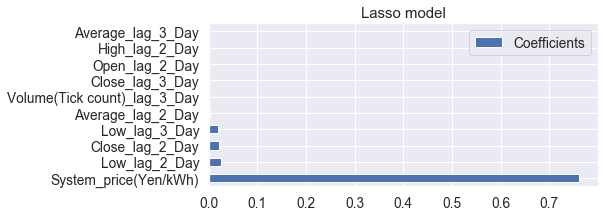

In [430]:
# Positive coeficients
coefs[:10].plot(kind='barh', figsize=(9, 3))
plt.title('Lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

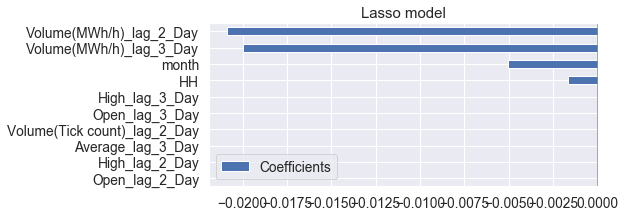

In [431]:
# Negative coeficients
end = len(coefs)
start = end - 10
coefs[start:end].plot(kind='barh', figsize=(9, 3))
plt.title('Lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

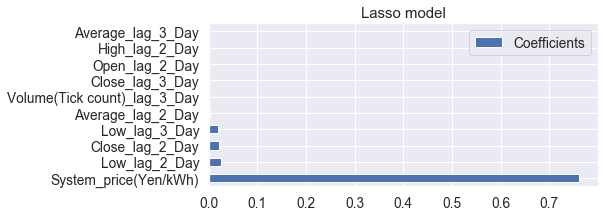

In [432]:
# Absolute coeficients
coef_abs[:10].plot(kind='barh', figsize=(9, 3))
plt.title('Lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

- Check RMSE/MAE of each fold

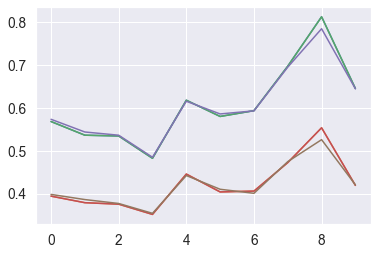

In [433]:
rmse_10fold_Linear.plot()
mae_10fold_Linear.plot()
rmse_10fold_Ridge.plot()
mae_10fold_Ridge.plot()
rmse_10fold_Lasso.plot()
mae_10fold_Lasso.plot()

## Non-linear model

### Linear Regression with PolynomialFeatures

In [434]:
from sklearn.preprocessing import PolynomialFeatures

dimension = 2

# 多項式をつくる
polynomial = PolynomialFeatures(degree=dimension)
Poly_X = polynomial.fit_transform(X)
Poly_X = pd.DataFrame(Poly_X)

Poly_X.shape

(83328, 171)

In [435]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_PolyLine = []
    
for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    #Fit train set to the model (Chooose one model)
    modelPolyLine = LinearRegression().fit(X_train, y_train)
    
    # Generate prediction results
    y_pred = modelPolyLine.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_PolyLine.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelPolyLine.score(X_train, y_train))     
    valid_accuracy.append(modelPolyLine.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_PolyLine = list(itertools.chain.from_iterable(prediction_PolyLine))
# Prediction with train data
y_pred_train = list(modelPolyLine.predict(X_train)[:Min_valid_index])
# Store the prediction into the "graph data" table
#graph_data_log = graph_data_log.reset_index()
graph_data_log["Close_pred_PolyLinear"] = pd.Series(y_pred_train + prediction_PolyLine)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["PolyLinear"] = pd.Series([np.mean(rmse), np.mean(mae)])

Training_accuracy: 0.6198194252306652
Valid_accuracy: 0.5481044755918556
RMSE: 0.6064175344930668
MAE: 0.41993094897958744


### XGBoost

In [436]:
from xgboost import XGBRegressor

training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_XGB = []

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    #Fit train set to the model
    modelXGB = XGBRegressor().fit(X_train, y_train)   
    # Generate prediction results
    y_pred = modelXGB.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_XGB.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelXGB.score(X_train, y_train))     
    valid_accuracy.append(modelXGB.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_XGB = list(itertools.chain.from_iterable(prediction_XGB))
# Prediction with train data
y_pred_train = list(modelXGB.predict(X_train)[:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_XGB"] = pd.Series(y_pred_train + prediction_XGB)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["XGB"] = pd.Series([np.mean(rmse), np.mean(mae)])

Training_accuracy: 0.7784990511134398
Valid_accuracy: 0.49012175516431566
RMSE: 0.6467181740060444
MAE: 0.4553401965099349


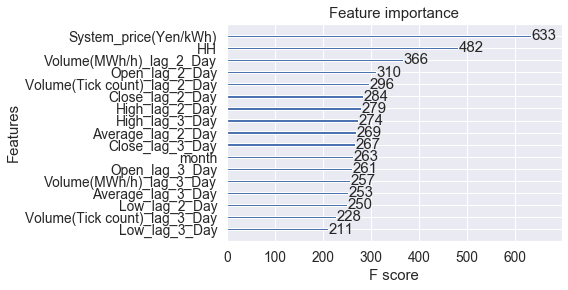

<Figure size 1000x500 with 0 Axes>

In [437]:
from xgboost import plot_importance

# plot feature importance
plot_importance(modelXGB, max_num_features = 20)
plt.figure(figsize=(10, 5),dpi=100)
plt.show()

### RamdomForest※時間がかかるので注意

In [438]:
# from sklearn.ensemble import RandomForestRegressor

# training_accuracy = []
# valid_accuracy = []
# rmse = []
# mae = []
# prediction_RF = []

# for train_index, valid_index in zip(Rolling_forward_split_train, Rolling_forward_split_valid):
#     # Divide the train/valid set  into 10 folds and pick up it.
#     X_train, X_valid = X.iloc[:train_index], X.iloc[train_index: valid_index]
#     y_train, y_valid = y.iloc[:train_index], y.iloc[train_index: valid_index]

#     #Fit train set to the model
#     modelRF = RandomForestRegressor(n_jobs = -1).fit(X_train, y_train) 
#     # Generate prediction results
#     y_pred = modelRF.predict(X_valid)
#     true_values = y_valid.values
#     # Save prediction results
#     prediction_RF.append(y_pred)
#     # Save evaluation results for each 10 validation and get mean
#     training_accuracy.append(modelRF.score(X_train, y_train))     
#     valid_accuracy.append(modelRF.score(X_valid, y_valid))     
#     rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
#     mae.append(mean_absolute_error(true_values, y_pred))

# # print("Training_accuracy: {}".format(training_accuracy))
# print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# # print("Valid_accuracy: {}".format(valid_accuracy))
# print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# # print("RMSE: {}".format(rmse))
# print("RMSE: {}".format(np.mean(rmse)))
# # print("MAE: {}".format(mae))
# print("MAE: {}".format(np.mean(mae)))

# # Convert prediction results with valid data from 2D list to 1D list
# prediction_RF = list(itertools.chain.from_iterable(prediction_RF))
# # Prediction with train data
# y_pred_train = list(modelRF.predict(X_train)[:Min_valid_index])
# # Store the prediction into the "graph data" table
# graph_data_log["Close_pred_RF"] = pd.Series(y_pred_train + prediction_RF)
# # Store the result of evaluation into the "Eval_table"
# Eval_table_log["RF"] = pd.Series([np.mean(rmse), np.mean(mae)])

In [439]:
# # Random Forestのfeature importance作成
# # plot feature importance
# df_feature_importance = pd.DataFrame(modelRF.feature_importances_, index=feature_list, columns=['feature importance']).sort_values('feature importance', ascending=True)
# #df_feature_all = pd.DataFrame([tree.feature_importances_ for tree in reg.estimators_], columns=boston.feature_names)
# df_feature_importance_top10 = df_feature_importance.tail(10)
# df_feature_importance_top10.plot(kind='barh');

## Statistical model 

In [440]:
# Data for statistical modeling
y_stats = all_data_log[["Date", "Time", "Close"]]
y_stats["DateTime"] = pd.to_datetime(y_stats["Date"].astype(str) + " " + y_stats["Time"].astype(str))
y_stats = y_stats.drop(["Date", "Time"], axis=1)

In [441]:
# ADF test for logarithmic price
ctt = sm.tsa.adfuller(y_stats.Close, regression="ctt")
round(ctt[1], 4)

0.0

Null hypothesis on ADF test could be rejected, so logarithmic price can be used for modeling.

### ARIMA

(reference) <p>

- Intuitive： https://logics-of-blue.com/python-time-series-analysis/ <p>
    -->Parameter: https://logics-of-blue.com/wp-content/uploads/2017/05/python-time-series-analysis-notebook.html#ARIMA%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E6%8E%A8%E5%AE%9A
    
- Detailed: https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

In [442]:
# # Top 5 coefficient from Linear model
# coef_abs = coefs.abs()
# coef_abs_list = list(coef_abs[:5].index)

coef_abs_list=["System_price(Yen/kWh)"]

# Pick up  Date, Time , Close and cols that have high importance on the linear model
arima_cols = ["Date", "Time", "Close"]
arima_cols = arima_cols + coef_abs_list
arima_cols

['Date', 'Time', 'Close', 'System_price(Yen/kWh)']

In [443]:
# Data for statistical modeling
all_data_stats = all_data_log.copy()
all_data_stats = all_data_stats[arima_cols]
all_data_stats["DateTime"] = pd.to_datetime(all_data_stats["Date"].astype(str) + " " + all_data_stats["Time"].astype(str))
all_data_stats = all_data_stats.drop(["Date", "Time"], axis=1)
X_stats = all_data_stats.drop(['Close', "DateTime"], axis=1)
X_stats =  np.array(X_stats)
y_stats = all_data_stats[["Close"]]
y_stats =  np.array(y_stats)

In [444]:
# ADF test for logarithmic price
ctt = sm.tsa.adfuller(y_stats, regression="ctt")
round(ctt[1], 4)

0.0

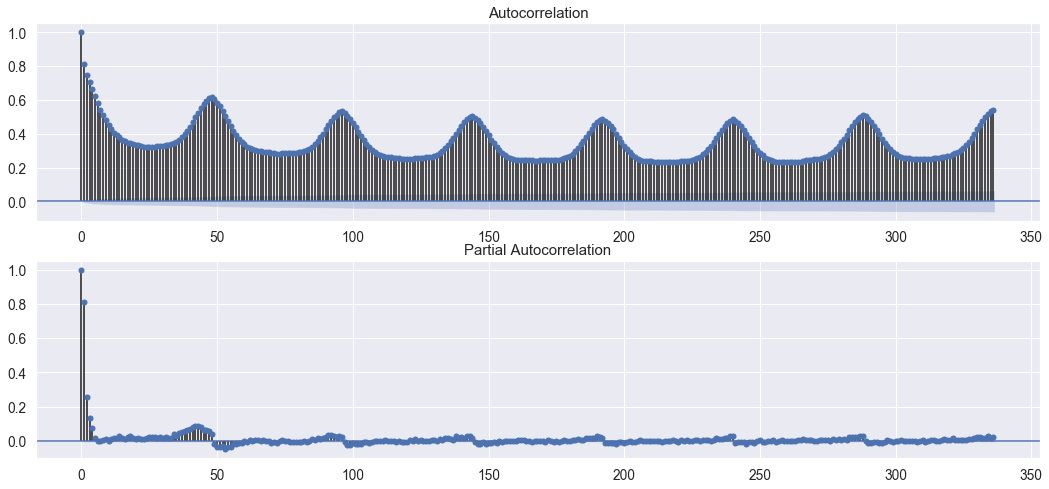

In [445]:
# Autocorrelation
fig = plt.figure(figsize=(18,8))
# Autocorrelation (1lag=30min --> 336 lags=1week)
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y_stats, lags=336, ax=ax1)

# Partial Autocorrelation
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y_stats, lags=336, ax=ax2)

In [446]:
# # Searching the optimal parameters for ARIMA
# resDiff = sm.tsa.arma_order_select_ic(y_stats.Close, ic='aic', trend='nc')
# resDiff

In [447]:
from statsmodels.tsa.arima.model import ARIMA

modelARIMA = ARIMA(y_stats, exog=X_stats).fit()

# Summary
print(modelARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                83328
Model:                          ARIMA   Log Likelihood              -72857.204
Date:                Tue, 30 Mar 2021   AIC                         145720.408
Time:                        17:05:47   BIC                         145748.400
Sample:                             0   HQIC                        145728.973
                              - 83328                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.077e-06      0.002     -0.003      0.998      -0.004       0.004
x1             0.8146      0.001    661.004      0.000       0.812       0.817
sigma2         0.3365      0.001    470.414      0.0

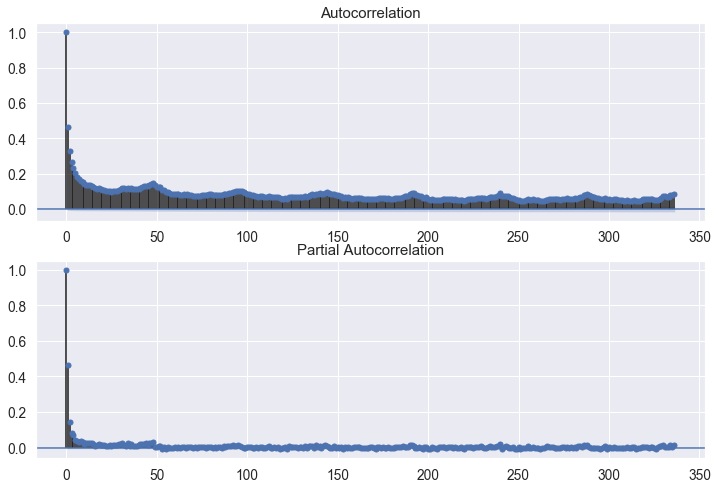

In [448]:
# Check the residual
resid = modelARIMA.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.squeeze(), lags=336, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=336, ax=ax2)

In [449]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_ARIMA = []

# Set the parameter for .predict() which is for in-sample prediciton
train_end =  prediction_point.to_pydatetime() - datetime.timedelta(minutes=30)

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    all_train, all_valid = all_data_stats.iloc[train_index], all_data_stats.iloc[valid_index]
    all_train, all_valid = all_train.set_index("DateTime"), all_valid.set_index("DateTime")
    # Pandas --> ndarray
    X_train = all_train.drop(['Close'], axis=1)
    X_train =  np.array(X_train)
    y_train = all_train[["Close"]]
    y_train =  np.array(y_train)
    X_valid = all_valid.drop(['Close'], axis=1)
    X_valid =  np.array(X_valid)
    y_valid = all_valid[["Close"]]
    y_valid =  np.array(y_valid) 

    #Fit train set to the model
    modelARIMA = ARIMA(y_train, exog=X_train
#                        order=(2, 0, 3),
                      ).fit() #上記セルのパラメータを参照
    # Generate prediction results
    y_pred = modelARIMA.forecast(steps=test_size, exog=X_valid) # test_size is set on "Preparation"
    true_values = y_valid
    # Save prediction results
    prediction_ARIMA.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_ARIMA = list(itertools.chain.from_iterable(prediction_ARIMA))
# Prediction with train data
y_pred_train = list(modelARIMA.predict())
y_pred_train = y_pred_train[:Min_valid_index]
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_ARIMA"] = pd.Series(y_pred_train + prediction_ARIMA)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["ARIMA"] = pd.Series([np.mean(rmse), np.mean(mae)])

RMSE: 0.6071209365128805
MAE: 0.41776017972426394


### SARIMAX

In [450]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelSARIMA = SARIMAX(y_stats, exog=X_stats).fit()
print(modelSARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                83328
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -62596.176
Date:                Tue, 30 Mar 2021   AIC                         125198.352
Time:                        17:07:46   BIC                         125226.343
Sample:                             0   HQIC                        125206.917
                              - 83328                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7911      0.002    428.198      0.000       0.788       0.795
ar.L1          0.4686      0.001    317.244      0.000       0.466       0.471
sigma2         0.2630      0.001    520.305      0.0

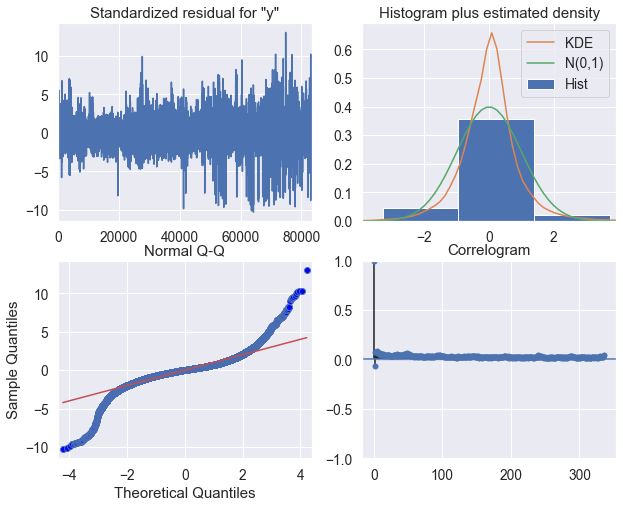

In [451]:
# Check residual (If periodicity can be seen, SARIMA model would be better)
# Plot/confirm residual (White noise)
modelSARIMA.plot_diagnostics(lags=336, figsize=[10, 8]);

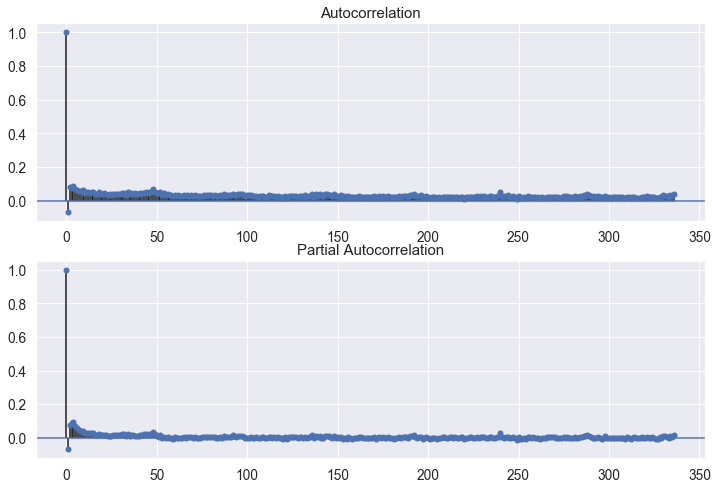

In [452]:
# Plot pertial Autocorrelation
resid = modelSARIMA.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.squeeze(), lags=336, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=336, ax=ax2)

SARIMAモデルのほうが季節性をカバーできているみたい --> SARIMAXですすめる

In [453]:
# y_train = y.iloc[Min_valid_index:]
# res = sm.tsa.arma_order_select_ic(y_train, max_ar=5, max_ma=7, ic='aic')
# print(res.aic_min_order)

In [454]:
# # 総当たりで、AICが最小となるSARIMAの次数を探す
# max_p = 3
# max_q = 3
# max_d = 2
# max_sp = 1
# max_sq = 1
# max_sd = 1

# pattern = max_p*(max_d + 1)*(max_q + 1)*(max_sp + 1)*(max_sq + 1)*(max_sd + 1)

# modelSelection = pd.DataFrame(index=range(pattern), columns=["model", "aic"])

# # 自動SARIMA選択
# num = 0

# for p in range(1, max_p + 1):
#     for d in range(0, max_d + 1):
#         for q in range(0, max_q + 1):
#             for sp in range(0, max_sp + 1):
#                 for sd in range(0, max_sd + 1):
#                     for sq in range(0, max_sq + 1):
#                         sarima = sm.tsa.SARIMAX(
#                             y_train, order=(p,d,q), 
#                             seasonal_order=(sp,sd,sq,48), 
#                             enforce_stationarity = False, 
#                             enforce_invertibility = False
#                         ).fit()
#                         modelSelection.iloc[num]["model"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), season=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
#                         modelSelection.iloc[num]["aic"] = sarima.aic
#                         num = num + 1

In [455]:
# # AIC確認
# modelSelection.sort_values(by='aic').head()

上記AICを確認し、AICが最小のパラメータの組み合わせをモデルに適用する

In [456]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_SARIMA = []

# Set the parameter for .predict() which is for in-sample prediciton
train_end =  prediction_point.to_pydatetime() - datetime.timedelta(minutes=30)

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    all_train, all_valid = all_data_stats.iloc[train_index], all_data_stats.iloc[valid_index]
    all_train, all_valid = all_train.set_index("DateTime"), all_valid.set_index("DateTime")
    # Pandas --> ndarray
    X_train = all_train.drop(['Close'], axis=1)
    X_train =  np.array(X_train)
    y_train = all_train[["Close"]]
    y_train =  np.array(y_train)
    X_valid = all_valid.drop(['Close'], axis=1)
    X_valid =  np.array(X_valid)
    y_valid = all_valid[["Close"]]
    y_valid =  np.array(y_valid) 
 
    #Fit train set to the model
    modelSARIMA = SARIMAX(y_train, 
#                        order=(2, 0, 3),
                      ).fit() #上記セルのパラメータを参照
    # Generate prediction results
    y_pred = modelSARIMA.forecast(steps=test_size, exog=X_valid) # test_size is set on "Preparation"
    true_values = y_valid
    # Save prediction results
    prediction_SARIMA.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_SARIMA = list(itertools.chain.from_iterable(prediction_SARIMA))
# Prediction with train data
y_pred_train = list(modelSARIMA.predict())
y_pred_train = y_pred_train[:Min_valid_index]
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_SARIMA"] = pd.Series(y_pred_train + prediction_SARIMA)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["SARIMA"] = pd.Series([np.mean(rmse), np.mean(mae)])

RMSE: 1.0429638448668423
MAE: 0.7786027839999342


Visualise for ARIMA model:
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

## Prophet (From Facebook)
Documentation of Prophet from Facebook:
https://peerj.com/preprints/3190/

Another documentation in Japanese:
https://mikiokubo.github.io/analytics/15forecast.html

In [457]:
# # Pick up  Date, Time , Close and cols that have high importance on the linear model
X_cols = ["System_price(Yen/kWh)"]

In [458]:
all_data_prop = all_data_lagged[["Date", "Time","System_price(Yen/kWh)", "Close"]]
all_data_prop["DateTime"] = pd.to_datetime(all_data_stats["Date"].astype(str) + " " + all_data_stats["Time"].astype(str))
all_data_prop = all_data_prop.drop(["Date", "Time"], axis=1)
all_data_prop.head()

,System_price(Yen/kWh),Close,DateTime
0,6.61,7.69,2016-04-01 00:00:00
1,6.34,7.45,2016-04-01 00:30:00
2,6.34,7.21,2016-04-01 01:00:00
3,6.25,7.06,2016-04-01 01:30:00
4,6.57,7.21,2016-04-01 02:00:00


In [459]:
# Set ds and y for the model
all_data_prop = all_data_prop.rename(columns={'DateTime': 'ds', 'Close': 'y'})

In [460]:
# Divide dataset into train/valid set
all_data_prop_train = all_data_prop.iloc[all_data_prop.index[:len(X)-test_size]]
all_data_prop_valid = all_data_prop.iloc[all_data_prop.index[len(X)-test_size:]]

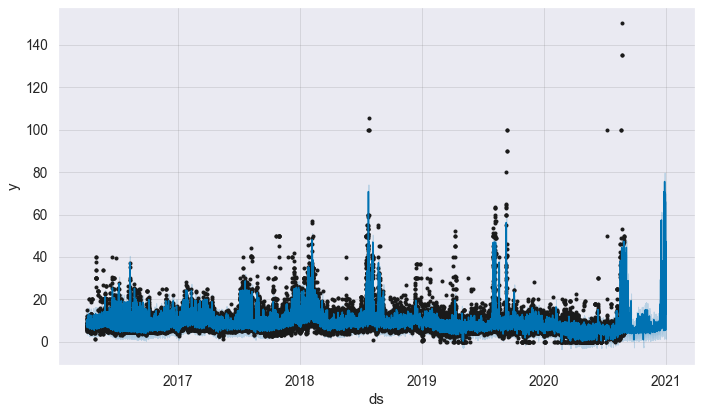

In [461]:
from fbprophet import Prophet
modelProp = Prophet()
# set exog for train data
for x in X_cols:
    modelProp = Prophet().add_regressor(x)

# fit train data
modelProp = modelProp.fit(all_data_prop_train)
# Make prediction datatable
future = modelProp.make_future_dataframe(periods=len(all_data_prop_valid), freq='30min')

# set exog for valid data
for x in X_cols:
    future[x] = all_data_prop[x]

# Plot
forecast = modelProp.predict(future)
modelProp.plot(forecast);

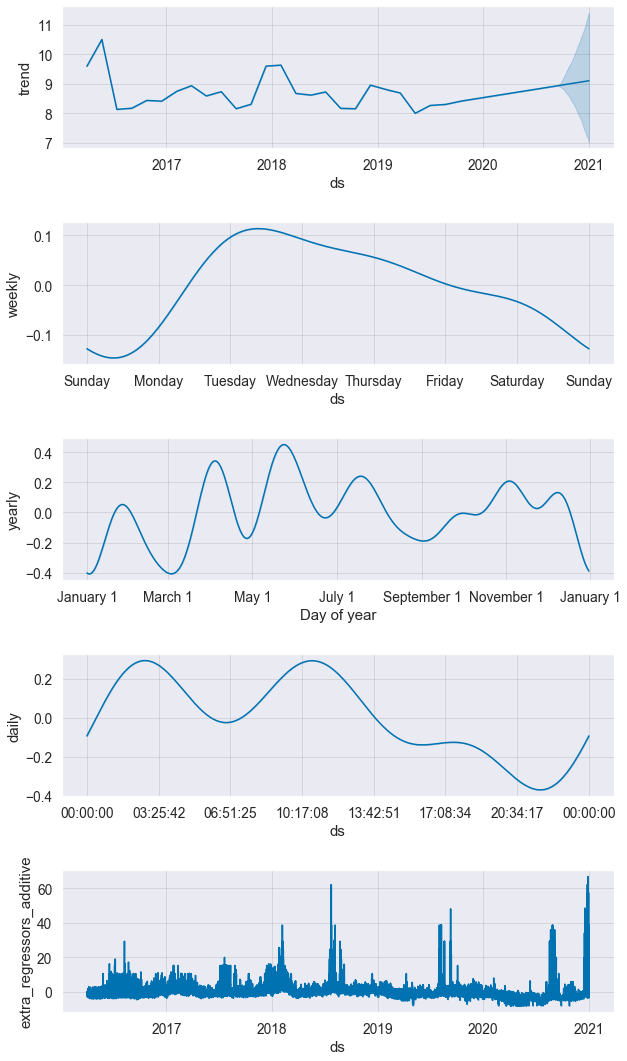

In [462]:
modelProp.plot_components(forecast);

- Modelling with cross validation

In [463]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_Prophet = []

# Set the parameter for .predict() which is for in-sample prediciton
train_end =  prediction_point.to_pydatetime() - datetime.timedelta(minutes=30)
    
for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    train_prop, valid_prop = all_data_prop.iloc[train_index], all_data_prop.iloc[valid_index]
#     y_train, y_valid = train_prop.set_index("ds"), valid_prop.set_index("ds")

    # Add exog for train data
    for x in X_cols:
        modelProphet = Prophet(yearly_seasonality=True).add_regressor(x)
    
    # fit train data
    modelProphet = modelProphet.fit(train_prop) 
    # Make prediction datatable (Need to adjust the parameter of period to match the number of rows)
    future = modelProphet.make_future_dataframe(periods=len(valid_prop), freq='30min')
    # Add exog for valid data
    for x in X_cols:
        # Add exog for valid data
        future[x] = all_data_prop[x]
    
    # Generate prediction results
#     future = future.fillna(0, inplace=True)
    forecast = modelProphet.predict(future)
    y_pred = forecast["yhat"][valid_index]
    true_values = valid_prop["y"]
    # Save prediction results
    prediction_Prophet.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_Prophet = list(itertools.chain.from_iterable(prediction_Prophet))
# Prediction with train data
y_pred_train = list(forecast["yhat"][:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_original["Close_pred_Prophet"] = pd.Series(y_pred_train + prediction_Prophet)
# Store the result of evaluation into the "Eval_table"
Eval_table_original["Prophet"] = pd.Series([np.mean(rmse), np.mean(mae)])

RMSE: 3.2467700573713407
MAE: 1.9544037304372956


# Visualisation of the model performance 

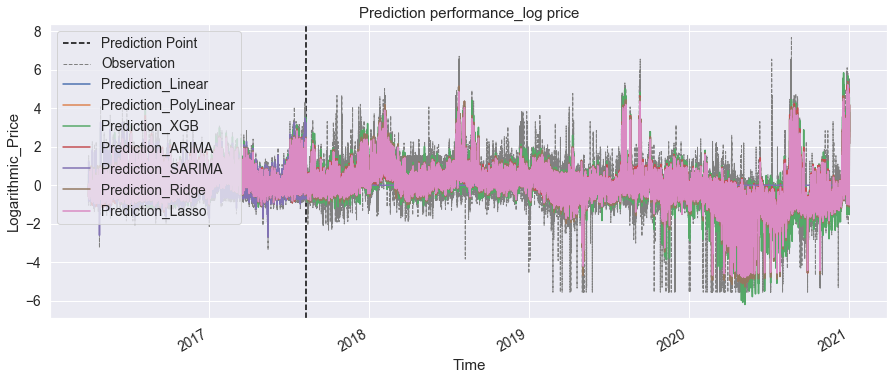

In [464]:
#対数化されたターゲットと予測値の比較

Models = ["Linear", "PolyLinear", "XGB", "ARIMA", "SARIMA", "Ridge", "Lasso"
         ]

start = "2016-04-01 00:00:00"
end = "2020-12-31 23:30:00"

fig, ax = plt.subplots(1, figsize=(15, 6))
plt.title('Prediction performance_log price')

# Set index
graph_data_log = graph_data_log.set_index("DateTime")

# Vertical line (need to convert the date type from timestamp to datetime.datetime as x-axis)
plt.axvline(prediction_point.to_pydatetime(), label="Prediction Point", linestyle="dashed", color="black")

# Plot Close 
graph_data_log.Close[graph_data_log.index > start].plot(ax=ax, label="Observation", linestyle="dashed", color="gray", linewidth=1)

# Plot the predicted price with each model
for model in Models:
    graph_data_log["Close_pred_" + model][graph_data_log.index > start].plot(ax=ax, label="Prediction_" + model)

# x-axis
plt.gcf().autofmt_xdate()
ax.set(xlabel="Time", ylabel="Logarithmic_Price")
plt.legend(loc="upper left");

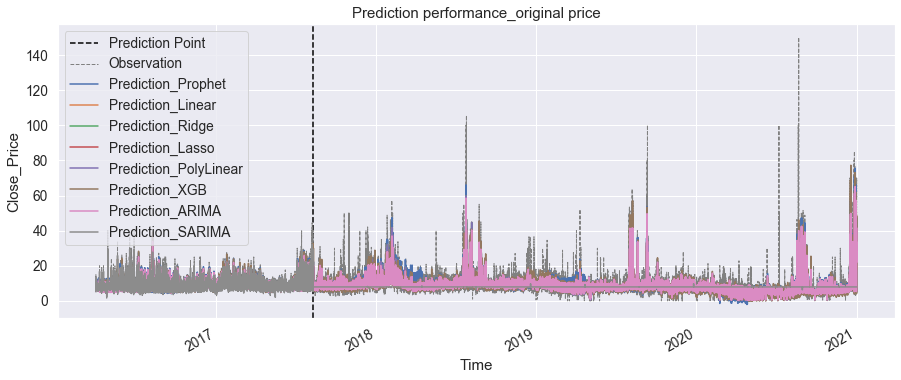

In [465]:
# graph_data_original = graph_data_original.reset_index()

Models = ["Linear", "Ridge", "Lasso", "PolyLinear", "XGB", "ARIMA", "SARIMA"]

for model in Models:
    # inverse for Prediction
    y_pred_original = inverse_trans_yeo_johnson(all_data_lagged["Close"].values.reshape(-1,1), graph_data_log["Close_pred_" + model].values.reshape(-1, 1))
    y_pred_original =  pd.DataFrame(y_pred_original)
    # Add the data on "graph_data"
    graph_data_original["Close_pred_" + model] = y_pred_original
    
    # Validation setに対してYen/kWhでの評価
    rmse = sqrt(mean_squared_error(graph_data_original.Close[Min_valid_index:], graph_data_original["Close_pred_" + model][Min_valid_index:]))
    mae = mean_absolute_error(graph_data_original.Close[Min_valid_index:], graph_data_original["Close_pred_" + model][Min_valid_index:])
    # Store the result of evaluation into the "Eval_table"
    Eval_table_original[model] = pd.Series([np.mean(rmse), np.mean(mae)])

graph_data_original = graph_data_original.set_index("DateTime")

# Plot the original close price and  predicted price
fig, ax = plt.subplots(1, figsize=(15, 6))
# Vertical line (need to convert the date type from timestamp to datetime.datetime as x-axis)
plt.axvline(prediction_point.to_pydatetime(), label="Prediction Point", linestyle="dashed", color="black")

# Plot Close
graph_data_original.Close[graph_data_original.index > start].plot(ax=ax, label="Observation", linestyle="dashed", color="gray", linewidth=1)

# Plot the predicted price with each model
for model in Models:
    graph_data_original["Close_pred_" + model][graph_data_original.index > start].plot(ax=ax, label="Prediction_" + model)

# Plot Prophet
graph_data_original["Close_pred_Prophet"][graph_data_original.index > start].plot(ax=ax, label="Prediction_Prophet")

# x-axis
plt.title('Prediction performance_original price')
plt.gcf().autofmt_xdate()
ax.set(xlabel="Time", ylabel="Close_Price")
plt.legend(loc="upper left");

In [466]:
# Evalation for the prediction of validation data based on log
Eval_table_log

,EvalFunc,Linear,Ridge,Lasso,PolyLinear,XGB,ARIMA,SARIMA
0,RMSE_log,0.606418,0.606420,0.605321,0.606418,0.646718,0.607121,1.042964
1,MAE_log,0.419931,0.419942,0.418816,0.419931,0.455340,0.417760,0.778603


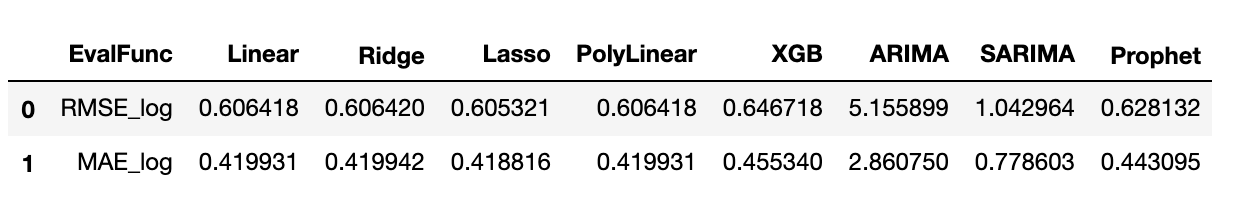

In [467]:
# Evalation for the prediction of validation data based on original
Eval_table_original

,EvalFunc,Prophet,Linear,Ridge,Lasso,PolyLinear,XGB,ARIMA,SARIMA
0,RMSE_Yen/kWh,3.246770,3.011551,3.011916,3.045273,3.011551,3.209732,3.003558,5.155899
1,MAE_Yen/kWh,1.954404,1.548206,1.548322,1.553342,1.548206,1.664133,1.543584,2.860750


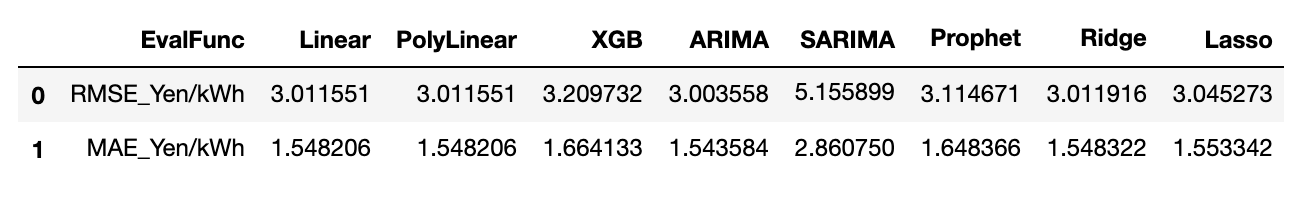

# 当Noteの結論 (予定)

- 自己回帰のパフォーマンスと機械学習のパフォーマンスを比べてみる
- ここでのパフォーマンスをベンチマークとして、別のNoteで特徴量を加えた機械学習の改善度合いを見てみる
- さらにどの特徴量が特に重要であるかも確認する
- 注目したい点は、out-of-sampleのパフォーマンスと価格スパイクのカバー度合い